In [22]:
import os
import sys
import glob
import csv
from typing import List
from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Results to include in the plot
RESULT_PATHS = [
                '/BrainSeg/data/outputs/UNet_Zero_Pad_2019O-512-BSCCE_cp-003-0.8061_postproc_method4_nearest',
                '/BrainSeg/data/outputs/UNet_Zero_Pad_2019O-512-BSCCE_cp-003-0.8061_postproc_method5']

LEGEND_NAMES = [
                'UNet_2019O_512_BSCCE_cp-003-0.8061_postproc_method4',
                'UNet_2019O_512_BSCCE_cp-003-0.8061_postproc_method5']

CSV_PATHS = [glob.glob(os.path.join(p, 'results', '*.csv'))[0] for p in RESULT_PATHS]
CSV_PATHS

['/BrainSeg/data/outputs/UNet_Zero_Pad_2019O-512-BSCCE_cp-003-0.8061_postproc_method4_nearest/results/20200628_195148.csv',
 '/BrainSeg/data/outputs/UNet_Zero_Pad_2019O-512-BSCCE_cp-003-0.8061_postproc_method5/results/20200629_013410.csv']

In [24]:
# Train/Val dataset
AD_TRAIN = "/BrainSeg/data/box_Ab/NA3777-02_AB.svs /BrainSeg/data/box_Ab/NA4077-02_AB.svs /BrainSeg/data/box_Ab/NA4092-02_AB.svs /BrainSeg/data/box_Ab/NA4160-02_AB.svs /BrainSeg/data/box_Ab/NA4195-02_AB.svs /BrainSeg/data/box_Ab/NA4299-02_AB.svs /BrainSeg/data/box_Ab/NA4391-02_AB.svs /BrainSeg/data/box_Ab/NA4553-02_AB.svs /BrainSeg/data/box_Ab/NA4672-02_AB.svs /BrainSeg/data/box_Ab/NA4675-02_AB.svs /BrainSeg/data/box_Ab/NA4691-02_AB.svs /BrainSeg/data/box_Ab/NA4695-02_AB.svs"
AD_VAL = "/BrainSeg/data/box_Ab/NA4107-02_AB.svs /BrainSeg/data/box_Ab/NA4256-02_AB.svs /BrainSeg/data/box_Ab/NA4450-02_AB.svs /BrainSeg/data/box_Ab/NA4463-02_AB.svs /BrainSeg/data/box_Ab/NA4471-02_AB.svs /BrainSeg/data/box_Ab/NA4626-02_AB.svs"
CONTROL_TRAIN = "/BrainSeg/data/box_control/NA4894-02_AB17-24.svs /BrainSeg/data/box_control/NA4944-02_AB17-24.svs /BrainSeg/data/box_control/NA4945-02_AB17-24.svs /BrainSeg/data/box_control/NA4967-02_AB17-24.svs /BrainSeg/data/box_control/NA4972-02_AB17-24.svs /BrainSeg/data/box_control/NA4992-02_AB17-24.svs /BrainSeg/data/box_control/NA5015-02_AB17-24.svs /BrainSeg/data/box_control/NA5029-02_AB17-24.svs"
CONTROL_VAL = "/BrainSeg/data/box_control/NA4907-02_AB17-24.svs /BrainSeg/data/box_control/NA4971-02_AB17-24.svs /BrainSeg/data/box_control/NA4993-02_AB17-24.svs /BrainSeg/data/box_control/NA5010-02_AB17-24.svs"

TRAIN_WSI = [p.split('/')[-1].replace('.svs', '') for p in AD_TRAIN.split(' ') + CONTROL_TRAIN.split(' ')]
VAL_WSI = [p.split('/')[-1].replace('.svs', '') for p in AD_VAL.split(' ') + CONTROL_VAL.split(' ')]

TRAIN_WSI, VAL_WSI

(['NA3777-02_AB',
  'NA4077-02_AB',
  'NA4092-02_AB',
  'NA4160-02_AB',
  'NA4195-02_AB',
  'NA4299-02_AB',
  'NA4391-02_AB',
  'NA4553-02_AB',
  'NA4672-02_AB',
  'NA4675-02_AB',
  'NA4691-02_AB',
  'NA4695-02_AB',
  'NA4894-02_AB17-24',
  'NA4944-02_AB17-24',
  'NA4945-02_AB17-24',
  'NA4967-02_AB17-24',
  'NA4972-02_AB17-24',
  'NA4992-02_AB17-24',
  'NA5015-02_AB17-24',
  'NA5029-02_AB17-24'],
 ['NA4107-02_AB',
  'NA4256-02_AB',
  'NA4450-02_AB',
  'NA4463-02_AB',
  'NA4471-02_AB',
  'NA4626-02_AB',
  'NA4907-02_AB17-24',
  'NA4971-02_AB17-24',
  'NA4993-02_AB17-24',
  'NA5010-02_AB17-24'])

In [25]:
# List available csv fieldnames
def list_csv_fieldnames(csv_path):
    with open(csv_path, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        print(f'Fieldnames: {reader.fieldnames}')
        
list_csv_fieldnames(CSV_PATHS[0])

Fieldnames: ['Image Name', 'Gray-TP', 'Gray-FP', 'Gray-FN', 'Gray-TN', 'Gray-Accuracy (%)', 'Gray-Misclassification_Rate (%)', 'Gray-Sensitivity (%)', 'Gray-Specificity (%)', 'Gray-Precision (%)', 'Gray-Prevalence (%)', 'Gray-IoU (%)', 'White-TP', 'White-FP', 'White-FN', 'White-TN', 'White-Accuracy (%)', 'White-Misclassification_Rate (%)', 'White-Sensitivity (%)', 'White-Specificity (%)', 'White-Precision (%)', 'White-Prevalence (%)', 'White-IoU (%)', 'Back-TP', 'Back-FP', 'Back-FN', 'Back-TN', 'Back-Accuracy (%)', 'Back-Misclassification_Rate (%)', 'Back-Sensitivity (%)', 'Back-Specificity (%)', 'Back-Precision (%)', 'Back-Prevalence (%)', 'Back-IoU (%)', 'Pixel_Accuracy (%)', 'Mean_Accuracy (%)', 'Mean_IoU (%)', 'Frequency_Weighted_IoU (%)']


In [26]:
# Fieldname to plot of all images
FIELD_NAME = 'Mean_IoU (%)'

In [27]:
# Get fieldnames for all CSVs
def get_csv_field(csv_paths: List[str], field_name: str) -> "OrderedDict[str, OrderedDict[str, float]]":
    """Get data from field_name of csv_paths
        Inputs: 
            csv_paths  : List, CSV file paths
            field_name : str, field name to extract from csv_paths
        Outputs: 
            csv_data: Dictionary {csv_path: Dictionary {Image Name: field_value} }
    """
    def checkEqual(iterator):
        iterator = iter(iterator)
        try:
            first = next(iterator)
        except StopIteration:
            return True
        return all(first == rest for rest in iterator)
    
    csv_data = OrderedDict()
    
    for csv_path in csv_paths:
        with open(csv_path, newline='') as csvfile:
            reader = csv.DictReader(csvfile)
            field_values = OrderedDict()
            for row in reader:
                field_values[row['Image Name']] = row[field_name]
        csv_data[csv_path] = field_values
    
    # Check if Image Names are the same in the same order
    assert checkEqual([csv.keys() for csv in csv_data.values()])
    
    return csv_data

In [28]:
csv_data = get_csv_field(CSV_PATHS, FIELD_NAME)
image_names = list(next(iter(csv_data.values())).keys())  # Extract image names from first CSV
image_names = [name.split('-')[0].replace('NA', '') for name in image_names]   # Leave only numbers for WSI

In [29]:
def plot_results(csv_data, image_names):
    plt.figure(figsize=[12, 4], dpi=300)
    for i, (csv_name, field_values) in enumerate(csv_data.items()):
        field_values = [float(v) for v in list(field_values.values())]
        plt.plot(field_values, 'o-', linewidth=2, label=LEGEND_NAMES[i])

    plt.xlabel('WSI Number')
    plt.xticks(range(0, 31), image_names, rotation=45)
    plt.title(FIELD_NAME)
    plt.grid()
    plt.legend()

def plot_trainval_results(csv_data, image_names, train_wsi_names, val_wsi_names):       
    train_wsi_names = [name.split('-')[0].replace('NA', '') for name in train_wsi_names]   # Leave only numbers for WSI
    val_wsi_names = [name.split('-')[0].replace('NA', '') for name in val_wsi_names]   # Leave only numbers for WSI

    train_idx, val_idx = [], []
    for idx, name in enumerate(image_names):
        if name in train_wsi_names:
            train_idx.append(idx)
            image_names[idx] += '*'    # Append a * to train WSIs
        elif name in val_wsi_names:
            val_idx.append(idx)
        else:
            if name != 'Average':
                raise ValueError('Unknown WSI name')

    image_names = list(np.array(image_names)[train_idx+val_idx+[len(image_names)-1]])  # Reorder image_names
    
    plt.figure(figsize=[12, 4], dpi=300)
    for i, (csv_name, field_values) in enumerate(csv_data.items()):
        field_values = [float(v) for v in list(field_values.values())]
        field_values = list(np.array(field_values)[train_idx+val_idx+[len(image_names)-1]])  # Reorder field_values
        plt.plot(field_values, 'o-', linewidth=2, label=LEGEND_NAMES[i])

    plt.xlabel('WSI Number (* - Train)')
    plt.xticks(range(0, 31), image_names, rotation=45)
    plt.title(FIELD_NAME)
    plt.grid()
    plt.legend()

Organize the plot based on train/val dataset


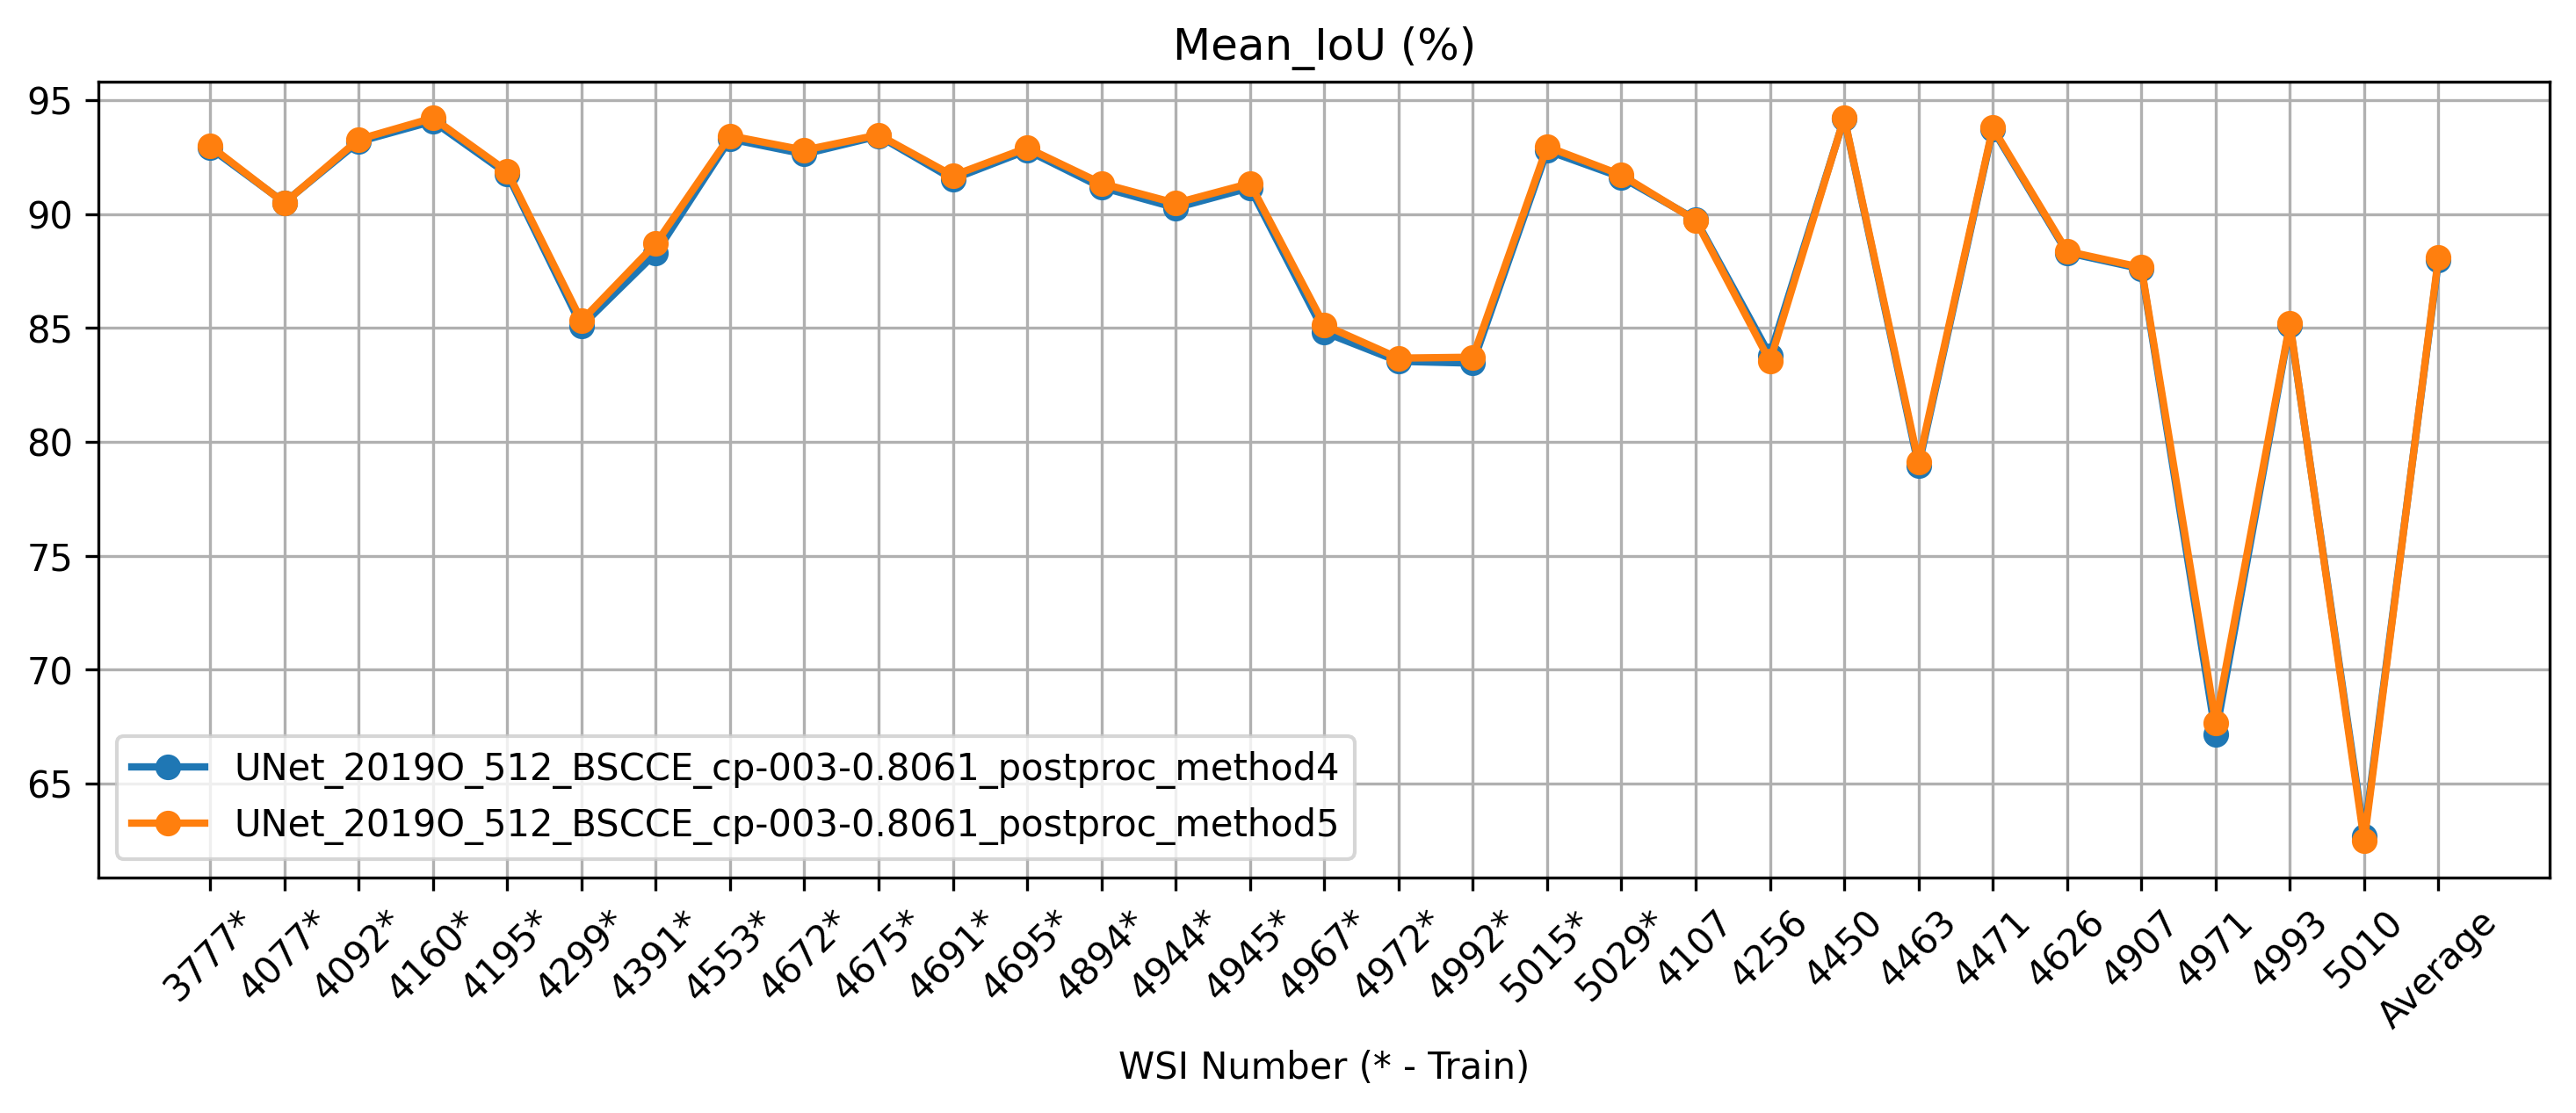

In [30]:
# Organize the plot based on train/val dataset
try:
    if TRAIN_WSI and VAL_WSI:
        print('Organize the plot based on train/val dataset')
        plot_trainval_results(csv_data, image_names, TRAIN_WSI, VAL_WSI)
    else:
        plot_results(csv_data, image_names)
except NameError:
    plot_results(csv_data, image_names)

In [31]:
# Organize the plot based on train/val dataset
try:
    if TRAIN_WSI and VAL_WSI:
        print('Organize the plot based on train/val dataset')
        plot_trainval_results(csv_data, image_names, TRAIN_WSI, VAL_WSI)
    else:
        plot_results(csv_data, image_names)
except NameError:
    plot_results(csv_data, image_names)

Organize the plot based on train/val dataset


ValueError: Unknown WSI name